
<h2>Project: Wrangle and Analyze Data</h1>

<h2>Table of content</h2>
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#Data wrangling">Data wrangling</a></li>
<li><a href="#Data gathering "> Data gathering </a></li>
<li><a href="#Data assessment">Data assessment</a></li>
<li><a href="#Visual assessments">Visual assessments</a></li>
<li><a href="#Programmatic assessments">Programmatic assessments</a></li>
<li><a href="#Data quality issues">Data quality issues</a></li>
<li><a href="#Data tidiness issues">Data tidiness issues</a></li>
<li><a href="#Data cleaning">Data cleaning</a></li>
<li><a href="#Storing, analyzing, and visualizing data">Storing, analyzing, and visualizing data</a></li>
<li><a href="#Reporting">Reporting</a></li>

</ul>

# Introduction

The main objective of this project is to wrangle the WeRateDogs Twitter data and create analyses and visualizations that can be used to draw reliable conclusions. On the first hand, I do have The WeRateDogs Twitter archive that contains basic tweets data, but not everything I would need to complete the analysis I would therefore need to gather additional data, assess them, clean, analyze and visualize in order to answer specific questions for this project.

Additional data will be accessed through Twitter API. This dataset included each tweet's retweet count and likes and much more information. The remaining data are hosted on Udacity's servers and will be downloaded programmatically through the following [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv). 

In [1]:
# Import all libraries that may be useful for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


# Data wrangling

## Data gathering 

In [2]:
# dowloading programmatically the image_predictions
import requests
url=" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r=requests.get(url)
with open((url.split('/')[-1]), mode="wb") as file:
        file.write(r.content)

In [3]:
 r.status_code == requests.codes.ok

True

In [4]:
#read the WeRateDogs Twitter archive file
twitter_archived=pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
len(twitter_archived.tweet_id.unique())

2356

In [6]:
#read the tweet image predictions file
image_predictions=pd.read_csv('image-predictions.tsv', delimiter="\t")

In [ ]:
# accessing twitter data using the twitter API
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# My user key were masked to comply with twitter terms and conditions 
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API. extracted from the twitter_archived
tweet_ids = twitter_archived.tweet_id.unique()
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
end = timer()
print(end - start)
print(fails_dict)


In [7]:
#read the tweet's JSON data
tweets_json=pd.read_json('tweet_json.txt', lines=True, encoding='utf-8')


## Data assessment

### Visual assessments

In [8]:
# Printing the twitter_archived data
twitter_archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
# Printing the twitter image_predictions data
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
# Printing the tweet's JSON data
tweets_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34995,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7343,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",30300,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5479,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22791,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3623,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",38258,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7532,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",36539,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8113,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",18429,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,2715,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",10719,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,1757,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",58953,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,16467,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",25360,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,3768,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",28943,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,6377,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


# Programmatic assessments

In [11]:
# Let's have a look at the top four observations for each dataset separately 
twitter_archived.head(4)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [12]:
image_predictions.head(4)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


In [13]:
tweets_json.head(4)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34995,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7343,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",30300,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5479,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22791,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3623,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",38258,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7532,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [14]:
# examine data dimension 
print(twitter_archived.shape,"number of rows and columns  for the twitter archived data")
print(image_predictions.shape,"number of rows and columns  for the image prediction data")
print(tweets_json.shape,"number of rows and columns for the twitter json dataset extracted with twitter API")

(2356, 17) number of rows and columns  for the twitter archived data
(2075, 12) number of rows and columns  for the image prediction data
(2331, 32) number of rows and columns for the twitter json dataset extracted with twitter API


In [15]:
## let's use the sample function to extract few observations
display(twitter_archived.sample(5))
display(image_predictions.sample(5))
display(tweets_json.sample(5))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
694,786729988674449408,NaN,NaN,2016-10-14 00:47:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oakley. He has no idea ...,7.594477e+17,4.196984e+09,2016-07-30 17:56:51 +0000,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,None,None,None,None
2179,669006782128353280,NaN,NaN,2015-11-24 04:17:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He is 100% ready for the sport...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669006782...,12,10,Tucker,None,None,None,None
120,869702957897576449,NaN,NaN,2017-05-30 23:51:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He likes road trips. Will shift ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869702957...,13,10,Stanley,None,None,None,None
1735,679729593985699840,NaN,NaN,2015-12-23 18:25:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He was playing with his ball m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679729593...,8,10,Hunter,None,None,None,None
1180,719339463458033665,NaN,NaN,2016-04-11 01:41:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lucy and Sophie. They think they'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719339463...,10,10,Lucy,None,None,None,None


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1154,732732193018155009,https://pbs.twimg.com/media/CiswCQhWYAI5-QW.jpg,1,koala,0.162935,False,Staffordshire_bullterrier,0.127969,True,mongoose,0.096421,False
1308,753655901052166144,https://pbs.twimg.com/media/CnWGCpdWgAAWZTI.jpg,1,miniature_pinscher,0.456092,True,toy_terrier,0.153126,True,Italian_greyhound,0.144147,True
1456,777641927919427584,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False
1418,771380798096281600,https://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg,1,collie,0.503728,True,Border_collie,0.450944,True,English_springer,0.012693,True
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
593,NaN,NaN,2016-11-11 19:55:50,"[16, 55]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,223,False,@JODYHiGHROLLER it may be an 11/10 but what do...,NaN,...,NaN,NaN,NaN,NaN,26,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
129,NaN,NaN,2017-05-22 00:28:40,"[0, 106]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 866450698984185856, 'id_str'...",112685,False,This is Jamesy. He gives a kiss to every other...,NaN,...,NaN,NaN,NaN,NaN,31585,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1517,NaN,NaN,2016-01-20 01:41:08,"[0, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 689623654657826819, 'id_str'...",2144,False,This is Lucy. She's terrified of the stuffed b...,NaN,...,NaN,NaN,NaN,NaN,616,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2163,NaN,NaN,2015-11-24 02:13:25,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668975674691067905, 'id_str'...",1207,False,This is Jeremy. He hasn't grown into his skin ...,NaN,...,NaN,NaN,NaN,NaN,529,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
719,NaN,NaN,2016-09-27 19:54:58,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 780858283800297472, 'id_str'...",7062,False,"This is Dash. He's very stylish, but also incr...",NaN,...,NaN,NaN,NaN,NaN,1958,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [16]:
# Let's have a loot at the basic data information( columns names, data type, columns missing with values and so on )
twitter_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [19]:
#let's check on the unique identification number for each data
print(twitter_archived.tweet_id.nunique())
print(image_predictions.tweet_id.nunique())
print(tweets_json.id_str.nunique())

2356
2075
2331


In [20]:
# we can also check whether we have duplicated in the Ids column of each dataset
print(twitter_archived.tweet_id.duplicated().sum())
print(image_predictions.tweet_id.duplicated().sum())
print(tweets_json.id_str.duplicated().sum())

0
0
0


In [21]:
#we do have some strange values as rate in the twitter_archived dataset
twitter_archived[twitter_archived.rating_numerator!=10].rating_numerator.unique()


array([  13,   12,   14,    5,   17,   11,  420,  666,    6,   15,  182,
        960,    0,   75,    7,   84,    9,   24,    8,    1,   27,    3,
          4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,  143,
        121,   20,   26,    2,  144,   88])

In [22]:
#let's check if we have missing values in the rate. can be the numerator or denominator
print(twitter_archived.rating_numerator.isna().sum())
print(twitter_archived.rating_denominator.isna().sum())

0
0


In [23]:
# Let's assess the denominator values which might be less or greateer than 10
pd.set_option('display.max_colwidth',-1)
twitter_archived[["text","rating_denominator"]][twitter_archived.rating_denominator!=10]

,text,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50


In [24]:
# let's have a look at the text column of twitter_archived dataset to assess the original rating 
#for those rows where the numerator is different from 10, I will focus on values greater than 20 because that is where 
#erroneous values are likely to be
pd.set_option('display.max_colwidth',-1)
twitter_archived[['tweet_id',"text","rating_numerator"]][twitter_archived.rating_numerator >20]

,tweet_id,text,rating_numerator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,838150277551247360,@markhoppus 182/10,182
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165


In [25]:
pd.set_option('display.max_colwidth',-1)
twitter_archived[['tweet_id',"text","rating_numerator","rating_denominator"]][twitter_archived.rating_denominator!=10]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [26]:
#check for duplicates in urls of the images
image_predictions.jpg_url.duplicated().sum()

66

In [27]:
##There is differences in the results of the three algorithms. especially on whether a classification yielded a breed of dog or somethig else
image_predictions[image_predictions['p1_dog']==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [28]:
## the original tweets 
tweets_json['retweeted'].value_counts()

False    2331
Name: retweeted, dtype: int64

### Data quality issues 

**The twitter archive data**

1. columns that are not necessary for the master file should be dropped. that is columns that do add value in the analysis.
2. Erroneous datatypes (doggo, floofer, pupper, puppo)
3. Though numerator can sometimes be greater than 10, we do have observations that have a rating denominator that is greater  than 10. which is uncommon for this dataset.
4. We also have incorrect numerators (Values like 960, 1776, etc.). i.e: the incorrect rating
5. timestamp column should be separated into year, month and day.
6. he incorrect data type of rates



  **The image prediction data**
  
7. We have three classification results that might not be necessary for this analysis. better to combine them 
8. Rename the predicted breeds classes 
9. some of the results of the predictions are not breeds of dogs, these should probably be excluded from the cleaned file



**The twitter_json data**
10.  tweet id name is not consistent with other tables
11.  keep important variables for this analysis


### Data tidiness issues

1.	Duplicate columns need to be removed.
2.	The three tables should be part of one large dataset
3.  The 4 dog categories (doggo,floofer,pupper, puppo) should make one categorical variable

## Data cleaning

In [29]:
##create copies of the original datasets
twitter_archive_clean=twitter_archived.copy()
image_predictions_clean=image_predictions.copy()
tweets_json_clean=tweets_json.copy()

**Columns that are not necessary for the analysis and final master file should be dropped from the archive data**


In [30]:
# subset and keep columns needed
twitter_archive_clean=twitter_archive_clean[['tweet_id','timestamp','text','rating_numerator',
                                               'rating_denominator','doggo','floofer','pupper','puppo']]

In [31]:
##test the code
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(6)
memory usage: 165.7+ KB


**Erroneous data types (doggo, floofer, pupper, puppo)**

Melt the doggo, floofer, pupper, and puppo columns to dog stage. 
Drop the four category stages from the clomuns.

In [32]:
# Let's create a new column "dog_stage" that should contain categorical values for the dog stages
twitter_archive_clean=pd.melt(twitter_archive_clean, id_vars=['tweet_id','timestamp',"text",'rating_numerator','rating_denominator'], 
                              var_name='stage', value_name="dog_stage")
##drop the stage column
twitter_archive_clean=twitter_archive_clean.drop('stage', axis=1)
#drop duplicate observations based on tweet_id
twitter_archive_clean=twitter_archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep="last")

In [33]:
#Test the code
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage
2259,667550904950915073,2015-11-20 03:51:52 +0000,"RT @dogratingrating: Exceptional talent. Original humor. Cutting edge, Nova Scotian comedian. 12/10 https://t.co/uarnTjBeVA",12,10,None
2260,667550882905632768,2015-11-20 03:51:47 +0000,RT @dogratingrating: Unoriginal idea. Blatant plagiarism. Curious grammar. -5/10 https://t.co/r7XzeQZWzb,5,10,None
2261,667549055577362432,2015-11-20 03:44:31 +0000,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,1,10,None
2262,667546741521195010,2015-11-20 03:35:20 +0000,Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,9,10,None
2263,667544320556335104,2015-11-20 03:25:43 +0000,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",10,10,None


In [34]:
#check the remaining columns info
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 6 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
dog_stage             2356 non-null object
dtypes: int64(3), object(3)
memory usage: 128.8+ KB


In [35]:
#test the code and confirm if we do have all four categories of dog stages
twitter_archive_clean.dog_stage.value_counts()

None       1976
pupper     257 
doggo      83  
puppo      30  
floofer    10  
Name: dog_stage, dtype: int64

In [36]:
# we have missing data in the dog stage column but this something I will not address in this project
twitter_archive_clean[twitter_archive_clean.dog_stage=="None"].tail()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage
3103,779834332596887552,2016-09-25 00:06:08 +0000,This is Scout. He really wants to kiss himself. H*ckin inappropriate. 11/10 narcissistic af https://t.co/x0gV2Ck3AD,11,10,None
3403,743510151680958465,2016-06-16 18:26:48 +0000,"This is Beya. She doesn't want to swim, so she's not going to. 13/10 nonconforming af (vid by @HappyTailsResor) https://t.co/qGeVjHSUKH",13,10,None
3039,788412144018661376,2016-10-18 16:11:17 +0000,This is Dexter. He breaks hearts for a living. 11/10 h*ckin handsome af https://t.co/4DhSsC1W7S,11,10,None
3094,780800785462489090,2016-09-27 16:06:28 +0000,This is Koda. He has a weird relationship with tall grass. Slightly concerning. 11/10 would def still pet https://t.co/KQzSR8eCsw,11,10,None
3101,780092040432480260,2016-09-25 17:10:10 +0000,RT @dog_rates: This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.c…,8,10,None


**Update data type for both rating-numerator and -denominator**

In [37]:
#update data type of the rate
twitter_archive_clean['rating_numerator']=twitter_archive_clean['rating_numerator'].astype(float)
#test the code
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 6 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null int64
dog_stage             2356 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 128.8+ KB


**we do have observations that have a rating denominator that is greater than 10. which is uncommon for this dataset.**

In [38]:
## let's then give our denominator a value of 10 to have consistency in our data
twitter_archive_clean["rating_denominator"]=10
#test the code
twitter_archive_clean.rating_denominator.unique()

array([10])

**We have observations that have erroneous values in the rating numerator**

I will update those values 

In [39]:
# some of the rate were for multiple dogs so I had to devide with the number of dogs 
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==835246439529840640), 'rating_numerator']=13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==832215909146226688), 'rating_numerator']=9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==820690176645140481), 'rating_numerator']=12
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==786709082849828864), 'rating_numerator']=9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==778027034220126208), 'rating_numerator']=11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==758467244762497024), 'rating_numerator']=11
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==731156023742988288), 'rating_numerator']=12
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==716439118184652801), 'rating_numerator']=11
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==713900603437621249), 'rating_numerator']=9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==710658690886586372), 'rating_numerator']=8
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==709198395643068416), 'rating_numerator']=9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==704054845121142784), 'rating_numerator']=12
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==697463031882764288), 'rating_numerator']=11
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==684225744407494656), 'rating_numerator']=11
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==684222868335505415), 'rating_numerator']=11
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==680494726643068929), 'rating_numerator']=11.26
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==677716515794329600), 'rating_numerator']=12
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==675853064436391936), 'rating_numerator']=8
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==775096608509886464), 'rating_numerator']=14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==722974582966214656), 'rating_numerator']=13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id==666287406224695296), 'rating_numerator']=9

In [40]:
##Test the above code
display(twitter_archive_clean[twitter_archive_clean.tweet_id==835246439529840640])
display(twitter_archive_clean[twitter_archive_clean.tweet_id==832215909146226688])
display(twitter_archive_clean[twitter_archive_clean.tweet_id==666287406224695296])

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage
2669,835246439529840640,2017-02-24 21:54:03 +0000,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13.0,10,None


,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage
2696,832215909146226688,2017-02-16 13:11:49 +0000,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75,10,None


,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage
2335,666287406224695296,2015-11-16 16:11:11 +0000,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0,10,None


In [41]:
## for obervation where the values are greater than 20 and I did not find clear reason, I will drop
errors=twitter_archive_clean[twitter_archive_clean.rating_numerator>=20].index
twitter_archive_clean=twitter_archive_clean.drop(errors, axis=0)
##test the code
twitter_archive_clean[twitter_archive_clean.rating_numerator>20]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage


**formating the timestamp by extracting year, month and day**

In [42]:
##extracting year, motnh, and day from the timestamp column
#and drop the timestamp column 
twitter_archive_clean["year"]=pd.DatetimeIndex(twitter_archive_clean["timestamp"]).year
twitter_archive_clean["month"]=pd.DatetimeIndex(twitter_archive_clean["timestamp"]).month
twitter_archive_clean["day"]=pd.DatetimeIndex(twitter_archive_clean["timestamp"]).day
twitter_archive_clean=twitter_archive_clean.drop(columns=["timestamp"], axis=1)
#test the code
twitter_archive_clean.head(4)

,tweet_id,text,rating_numerator,rating_denominator,dog_stage,year,month,day
2259,667550904950915073,"RT @dogratingrating: Exceptional talent. Original humor. Cutting edge, Nova Scotian comedian. 12/10 https://t.co/uarnTjBeVA",12.0,10,None,2015,11,20
2260,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant plagiarism. Curious grammar. -5/10 https://t.co/r7XzeQZWzb,5.0,10,None,2015,11,20
2261,667549055577362432,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,1.0,10,None,2015,11,20
2262,667546741521195010,Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,9.0,10,None,2015,11,20


**We have three classification results in the image prediction which might not be necessary for this analysis**

I will therefore drop those columns in the image prediction dataset and just keep the result from the first, second, and third algorithm where the classification resulted in a dog breed

In [43]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
# I will first create a function to extract true values and then append all true values in one list
#create an empty list
dog_breed=[]
#create a function for extracting dog breed
def dog_type(image_predictions_clean):
    if image_predictions_clean.p1_dog==True:
        dog_breed.append(image_predictions_clean.p1)
    elif image_predictions_clean.p2_dog==True:
         dog_breed.append(image_predictions_clean.p2)
    elif image_predictions_clean.p3_dog==True:
        dog_breed.append(image_predictions_clean.p3)
    else:
        dog_breed.append("None")
#extract the dog types in the three columns
image_predictions_clean.apply(dog_type,axis=1)
## create a column of dog breed by in the image_predictions_clean
image_predictions_clean["dog_breed"]=dog_breed
##test the code
image_predictions_clean.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,None
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle


In [45]:
#drop all other columns and just keep newly created column of te dog breed, next to tweet_id and jpg_url
image_predictions_clean=image_predictions_clean.drop(['img_num','p1','p1_dog','p1_conf',
                                                      'p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','img_num'], axis=1)

#filter all observation where the classification has resulted i a dog breed only
image_predictions_clean=image_predictions_clean[image_predictions_clean.dog_breed!="None"]

#test the code
image_predictions_clean.head(20)

,tweet_id,jpg_url,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever


In [46]:
## dupplicates in the jpg_url column
image_predictions_clean=image_predictions_clean.drop_duplicates(subset="jpg_url", keep="first")
#test the code
image_predictions_clean.jpg_url.duplicated().sum()

0

In [47]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id     1691 non-null int64
jpg_url      1691 non-null object
dog_breed    1691 non-null object
dtypes: int64(1), object(2)
memory usage: 52.8+ KB


 **I Will drop columns in the tweets_json file which are not important for this analysis**  
  I will therefore keep the id, full_text, the favorite_count, and retweet_count variables only as part of the cleaned version
   I will also rename the id to **tweet_id**variable so that we can easily merge this table with the rest

In [48]:
#subsetting necessary variables for the analysis and the rename those variable
tweets_json_clean=tweets_json_clean[["id","favorite_count","retweet_count"]]
tweets_json_clean.rename(columns={"id":"tweet_id","favorite_count":"likes","retweet_count":"retweets"}, inplace=True)
#test the code
tweets_json_clean.head(4)

,tweet_id,likes,retweets
0,892420643555336193,34995,7343
1,892177421306343426,30300,5479
2,891815181378084864,22791,3623
3,891689557279858688,38258,7532


**I will now merge the three tables to make twitter_archive_master.csv**

but first let's have another look at the three datasets

In [49]:
# but let us assess the content of the cleaned versions first
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 2259 to 7236
Data columns (total 8 columns):
tweet_id              2349 non-null int64
text                  2349 non-null object
rating_numerator      2349 non-null float64
rating_denominator    2349 non-null int64
dog_stage             2349 non-null object
year                  2349 non-null int64
month                 2349 non-null int64
day                   2349 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 165.2+ KB


In [50]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id     1691 non-null int64
jpg_url      1691 non-null object
dog_breed    1691 non-null object
dtypes: int64(1), object(2)
memory usage: 52.8+ KB


In [51]:
tweets_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id    2331 non-null int64
likes       2331 non-null int64
retweets    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [52]:
#merge the three datasets
df=image_predictions_clean.merge(twitter_archive_clean, on="tweet_id").merge(tweets_json_clean, on="tweet_id")
df.shape

(1683, 12)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683 entries, 0 to 1682
Data columns (total 12 columns):
tweet_id              1683 non-null int64
jpg_url               1683 non-null object
dog_breed             1683 non-null object
text                  1683 non-null object
rating_numerator      1683 non-null float64
rating_denominator    1683 non-null int64
dog_stage             1683 non-null object
year                  1683 non-null int64
month                 1683 non-null int64
day                   1683 non-null int64
likes                 1683 non-null int64
retweets              1683 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 170.9+ KB


# Storing, analyzing, and visualizing  wrangled data

In [54]:
# we will now store our master file as csv file
df.to_csv("twitter_archive_master.csv", index=False)

Text(0,0.5,'Type of dog')

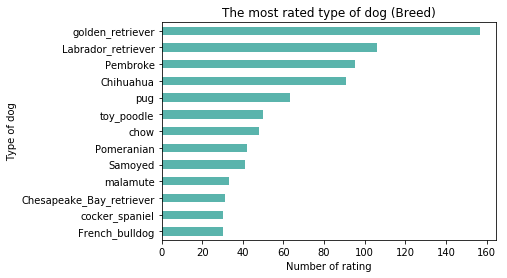

In [55]:
#subset our dataset and create a dataframe of breeds 
df_breed= df.groupby('dog_breed').filter(lambda x: len(x) >= 30)

df_breed['dog_breed'].value_counts().sort_values().plot(kind = 'barh', color="#5ab4ac")
plt.title('The most rated type of dog (Breed)')
plt.xlabel('Number of rating')
plt.ylabel('Type of dog');

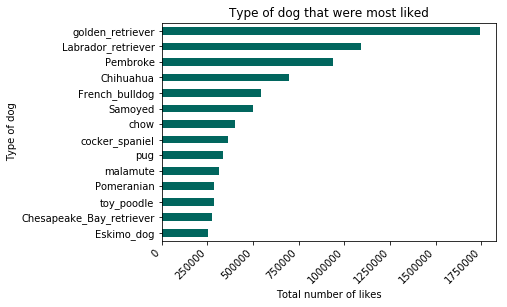

In [56]:
df2=df.pivot_table(values="likes", index='dog_breed',aggfunc=np.sum)
df2[df2.likes>250000].sort_values(by="likes").plot(legend=None,
 y="likes",color="#01665e",kind="barh")
plt.title("Type of dog that were most liked")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Type of dog")
plt.xlabel("Total number of likes");

# Insight 1

**Based on the above figures, golden retriever is the most common and tweeted type of dog**

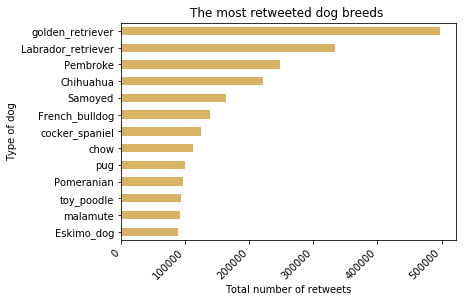

In [57]:
# Plot of retweets
df3=df.pivot_table(values="retweets", index='dog_breed',aggfunc=np.sum)
df3[df3.retweets>80000].sort_values(by="retweets").plot(legend=None,
 y="retweets",color="#d8b365",kind="barh")
plt.title("The most retweeted dog breeds ")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Type of dog")
plt.xlabel("Total number of retweets");

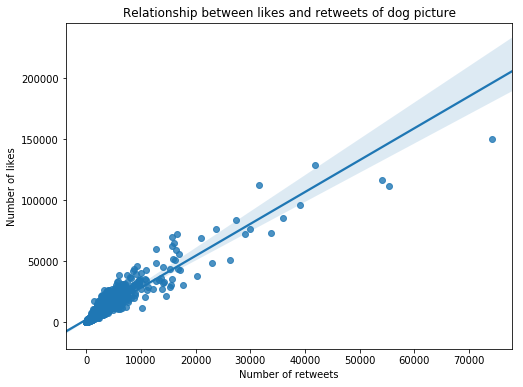

In [58]:
##the relationship between the number of likes and retweets
plt.figure(figsize=(8,6))
sns.regplot(x="retweets", y="likes", data=df)
plt.ylabel("Number of likes")
plt.xlabel("Number of retweets")
plt.title("Relationship between likes and retweets of dog picture");

In [59]:
#let'group rating, likes and retweets by dog breeds and calculate the mean value per category
df4=df.groupby("dog_breed")["rating_numerator", "likes","retweets"].mean()
df4.head()

,rating_numerator,likes,retweets
dog_breed,,,
Afghan_hound,9.666667,15247.000000,4988.333333
Airedale,9.833333,4657.583333,1171.666667
American_Staffordshire_terrier,10.133333,7458.733333,1730.466667
Appenzeller,11.000000,6483.500000,1202.500000
Australian_terrier,11.500000,9873.000000,2609.000000


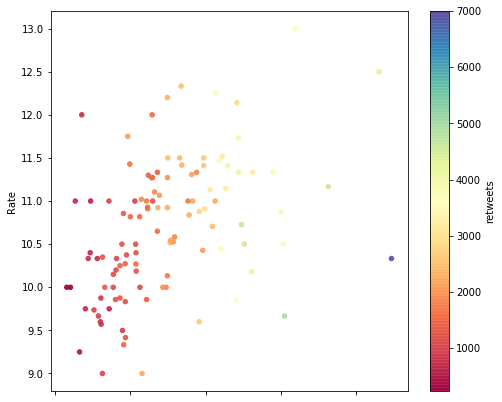

In [60]:
# Let's have a look if there is a clear relationship between averae value of dog rate, likes and retweets
# we have rescaled the y axis as I have only one observation with a rate lower than 9
df4[df4.rating_numerator>=9].plot.scatter(x='likes', y='rating_numerator', c='retweets', figsize=(8,7), cmap='Spectral', alpha=0.9)
plt.ylabel("Rate")
plt.xlabel("Number of likes")
fig = plt.gcf() 
fig.savefig('rate_vs_likes_vs_retweets.png');

In [61]:
#correlation analysis between average rating, likes and retweets of dog breeds
print(df4[['rating_numerator','likes','retweets']].corr())

                  rating_numerator     likes  retweets
rating_numerator  1.000000          0.443601  0.384274
likes             0.443601          1.000000  0.939219
retweets          0.384274          0.939219  1.000000


In [62]:
#let's check if these correlation are significant
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['likes'], df['rating_numerator'])
print("r=",pearson_coef,"and", "p-value=",p_value)

r= 0.388534547771 and p-value= 9.17746660442e-62


In [63]:
pearson_coef, p_value = stats.pearsonr(df['retweets'], df['rating_numerator'])
print("r=",pearson_coef,"and", "p-value=",p_value)

r= 0.292949613066 and p-value= 1.16669790741e-34


# insight 2

**Based on the above results and figure, on average there is evidence of a clear relationship between a dog rate and the number of likes and retweets a photo has received.**

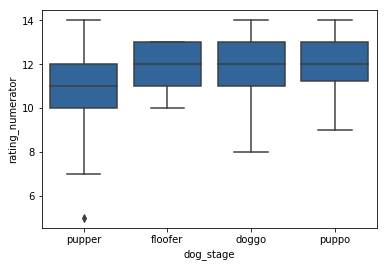

In [64]:
#let's look on the rate distribution grouped by dog stage, exluding the missing ones
sns.boxplot(x="dog_stage", y="rating_numerator", data=df[df.dog_stage!="None"],color="#2166ac");

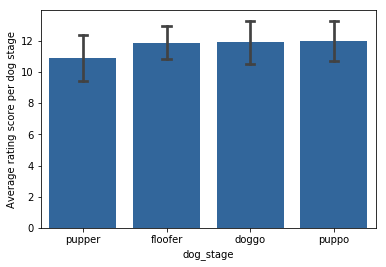

In [65]:
#let's look on the average rate grouped by dog stage, exluding the missing ones
sns.barplot(x="dog_stage", y="rating_numerator", data=df[df.dog_stage!="None"],ci="sd", capsize=.1, color="#2166ac");
plt.ylabel("Average rating score per dog stage");

# Insight 3
**Based on this data, on average people like and rate the same way all dogs regardless of their stage categories. That is, there is no difference in the average rate score between dog stages**